# Estatística Frequências e Medidas - Desafio Final

**Proposta do desafio**

Considerando a base de dados de `ENEM_2023.json` responda as questões abaixo (os dados são fictícios).

Você é uma pesquisadora de um cursinho para estudantes que querem ingressar na universidade em 2025.

Seu objetivo é retirar informações da base de dados do Enem do ano anterior para alinhar melhor as estratégias do cursinho para cada estudante.

O dado possui 6 colunas, 5 delas representam as disciplinas do ENEM e uma o gênero das pessoas que fizeram a prova. No dado, existe a representação de 1000 pessoas, sendo cada uma delas uma linha.

In [1]:
# Bibliotecas base
import pandas as pd
import numpy as np

# Bibliotecas para visualizacao de dados
import matplotlib.pyplot as plt
import seaborn as sns

## Conhecendo a base de dados

In [2]:
# Leitura e visualização do .json
df = pd.read_json('ENEM_2023.json')
df.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem


In [3]:
# Tipos de variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Linguagens            897 non-null    float64
 1   Ciências humanas      936 non-null    float64
 2   Ciências da natureza  824 non-null    float64
 3   Matemática            924 non-null    float64
 4   Redação               860 non-null    float64
 5   Sexo                  1000 non-null   object 
dtypes: float64(5), object(1)
memory usage: 54.7+ KB


In [4]:
# Estatísticas descritivas
df.describe()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
count,897.000000,936.000000,824.000000,924.000000,860.000000
mean,514.524809,527.042281,499.315583,535.965660,637.783532
std,84.009313,77.811519,78.760404,86.648100,115.339972
min,287.000000,289.900000,314.400000,319.800000,270.839965
25%,458.360558,475.424546,444.709076,479.172971,556.468366
50%,515.045250,524.519920,500.479263,533.247767,635.273973
75%,571.635876,581.401952,548.751678,592.912963,715.989868
max,804.456317,763.919695,802.004568,807.877902,1000.000000


In [5]:
# Verifica a quantidade de valores nulos por coluna
df.isnull().sum()

Linguagens              103
Ciências humanas         64
Ciências da natureza    176
Matemática               76
Redação                 140
Sexo                      0
dtype: int64

## Exercício 01.

Qual das disciplinas tem a maior amplitude de nota?

In [6]:
# Calculando a amplitude de cada disciplina
amplitude_por_disciplina = df.iloc[:, :5].max() - df.iloc[:, :5].min()
amplitude_por_disciplina

Linguagens              517.456317
Ciências humanas        474.019695
Ciências da natureza    487.604568
Matemática              488.077902
Redação                 729.160035
dtype: float64

In [7]:
# Resposta:
print(f"A disciplina com a maior amplitude é {amplitude_por_disciplina.idxmax()}.")

A disciplina com a maior amplitude é Redação.


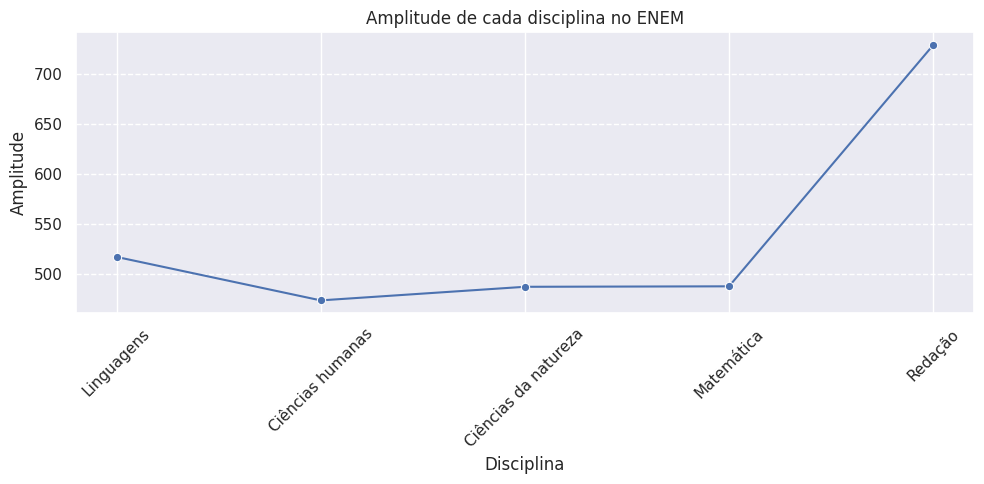

In [8]:
# Exibindo o gráfico
sns.set_theme()
plt.figure(figsize=(10, 5))
sns.lineplot(x=amplitude_por_disciplina.index, y=amplitude_por_disciplina.values, marker='o')
plt.title('Amplitude de cada disciplina no ENEM')
plt.xlabel('Disciplina')
plt.ylabel('Amplitude')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

## Exercício 02.

Qual é a média e a mediana para cada uma das disciplinas? (Lembre-se de remover todos os valores nulos quando considerar a mediana)

In [9]:
# Encontra a média por disciplina
media_por_disciplina = df.iloc[:, :5].mean()

# Resposta
print(f"Média por disciplinas: \n{media_por_disciplina}")

Média por disciplinas: 
Linguagens              514.524809
Ciências humanas        527.042281
Ciências da natureza    499.315583
Matemática              535.965660
Redação                 637.783532
dtype: float64


In [10]:
# Encontra a mediana por disciplina, desconsiderando os valores nulos (a função median() já tem a proprieda skipna=True por padrão)
mediana_por_disciplina = df.iloc[:, :5].median()

# Resposta
print(f"Mediana por disciplinas: \n{mediana_por_disciplina}")

Mediana por disciplinas: 
Linguagens              515.045250
Ciências humanas        524.519920
Ciências da natureza    500.479263
Matemática              533.247767
Redação                 635.273973
dtype: float64


In [11]:
# Outra abordagem

# Selecionando apenas as colunas numéricas
colunas_numericas = df.select_dtypes(include=np.number).columns

for column in colunas_numericas:
    # Calculando a média
    media = df[column].mean()

    # Calculando a mediana
    mediana = df[column].median()

    # Resposta
    print(f"\nDisciplina: {column}. \nMédia: {media}. \nMediana: {mediana}.")


Disciplina: Linguagens. 
Média: 514.5248092106333. 
Mediana: 515.0452497632.

Disciplina: Ciências humanas. 
Média: 527.0422808644046. 
Mediana: 524.51992005745.

Disciplina: Ciências da natureza. 
Média: 499.3155828489798. 
Mediana: 500.47926306565.

Disciplina: Matemática. 
Média: 535.9656600928728. 
Mediana: 533.2477669785001.

Disciplina: Redação. 
Média: 637.7835320695872. 
Mediana: 635.27397319435.


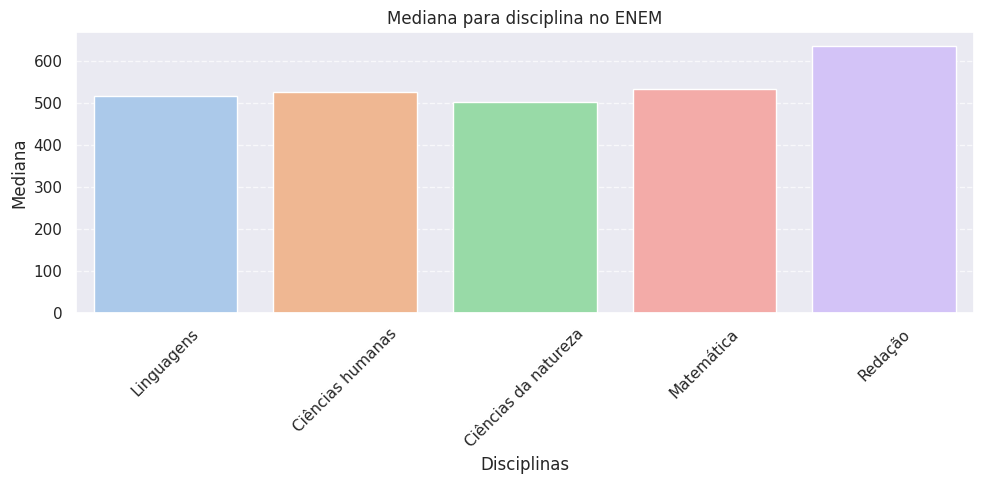

In [12]:
# Exibindo o gráfico
mediana_por_disciplina.index = ['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática', 'Redação']

sns.set_theme()
plt.figure(figsize=(10, 5))
sns.barplot(x=mediana_por_disciplina.index, y=mediana_por_disciplina.values, hue=mediana_por_disciplina.index, palette='pastel')
plt.title('Mediana para disciplina no ENEM')
plt.xlabel('Disciplinas')
plt.ylabel('Mediana')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Exercício 03.

Considerando o curso de Ciência da Computação da UFPE, onde o peso cada uma das disciplinas ponderado:

A. Redação - 2

B. Matemática e suas Tecnologias - 4

C. Linguagens, Códigos e suas Tecnologias - 2

D. Ciências Humanas e suas Tecnologias - 1

E. Ciências da Natureza e suas Tecnologias - 1

Qual o desvio padrão e a média das notas dos 500 estudantes mais bem colocados considerando esses pesos?

In [13]:
# Copiando o DataFrame
df_UFPE = df.copy()

# Tratando nulos antes de calcular a média ponderada
df_UFPE.dropna(inplace = True)

# Definindo os pesos de cada disciplina
pesos = {'Redação': 2, 'Matemática': 4, 'Linguagens': 2, 'Ciências humanas': 1, 'Ciências da natureza': 1}

# Calculando a média ponderada das disciplinas
df_UFPE['Média Ponderada'] = (df_UFPE['Redação'] * pesos['Redação'] +
                              df_UFPE['Matemática'] * pesos['Matemática'] +
                              df_UFPE['Linguagens'] * pesos['Linguagens'] +
                              df_UFPE['Ciências humanas'] * pesos['Ciências humanas'] +
                              df_UFPE['Ciências da natureza'] * pesos['Ciências da natureza']) / sum(pesos.values())

# Encontrando os 500 estudantes mais bem colocados
melhores_candidatos = df_UFPE.nlargest(500, 'Média Ponderada')

# Calculando a média das notas dos melhores candidatos
media_melhores_candidatos = melhores_candidatos['Média Ponderada'].mean()

# Calculando o desvio padrão das notas dos melhores candidatos
desvio_padrao_melhores_candidatos = melhores_candidatos['Média Ponderada'].std()

# Resposta
print(f"Média das notas dos 500 melhores candidatos: {media_melhores_candidatos}")
print(f"Desvio padrão das notas dos 500 melhores candidatos: {desvio_padrao_melhores_candidatos}")

Média das notas dos 500 melhores candidatos: 557.2896772018769
Desvio padrão das notas dos 500 melhores candidatos: 40.435866299464266


In [14]:
# Outra abordagem

# Calculando a média e o desvio padrão das notas dos 500 melhores candidatos por disciplina
media_por_disciplina = melhores_candidatos.select_dtypes(include=np.number).mean()
desvio_padrao_por_disciplina = melhores_candidatos.select_dtypes(include=np.number).std()

# Resposta
print(f"Média das notas dos 500 melhores candidatos por disciplina: \n{media_por_disciplina}")
print(f"\nDesvio padrão das notas dos 500 melhores candidatos por disciplina: \n{desvio_padrao_por_disciplina}")

Média das notas dos 500 melhores candidatos por disciplina: 
Linguagens              522.839398
Ciências humanas        529.920191
Ciências da natureza    503.086728
Matemática              547.407965
Redação                 652.289598
Média Ponderada         557.289677
dtype: float64

Desvio padrão das notas dos 500 melhores candidatos por disciplina: 
Linguagens               80.774298
Ciências humanas         77.131378
Ciências da natureza     78.613174
Matemática               83.240776
Redação                 109.963819
Média Ponderada          40.435866
dtype: float64


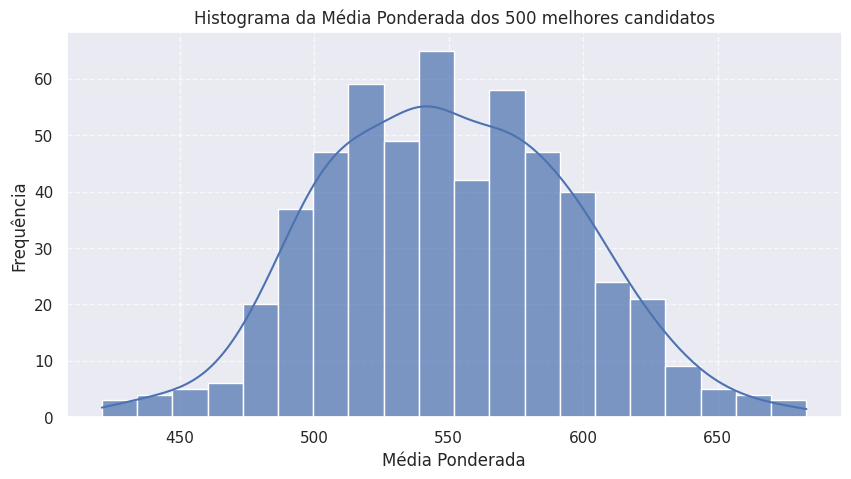

In [15]:
# Exibindo o gráfico
sns.set_theme()
plt.figure(figsize=(10, 5))
sns.histplot(df_UFPE['Média Ponderada'], bins=20, alpha=0.7, kde=True)
plt.title('Histograma da Média Ponderada dos 500 melhores candidatos')
plt.xlabel('Média Ponderada')
plt.ylabel('Frequência')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Exercício 04.

Se todos esses estudantes aplicassem para ciência da computação e existem apenas 40 vagas, qual seria a variância e média da nota dos estudantes que entraram no curso de ciência da computação?

In [16]:
# Selecionando os 40 candidatos que passaram
candidatos_aprovados = melhores_candidatos.head(40)

# Calculando a média das notas desses 40 candidatos
media_candidatos_aprovados = candidatos_aprovados['Média Ponderada'].mean()

# Calculando a variância das notas desses 40 candidatos
variancia_candidatos_aprovados = candidatos_aprovados['Média Ponderada'].var()

# Resposta
print(f"Média das notas dos candidatos aprovados em Ciência da Computação: {media_candidatos_aprovados}.")
print(f"Variância das notas dos candidatos aprovados em Ciência da Computação: {variancia_candidatos_aprovados}.")

Média das notas dos candidatos aprovados em Ciência da Computação: 636.6827415075188.
Variância das notas dos candidatos aprovados em Ciência da Computação: 295.7675036004101.


In [17]:
# Outra aboragem

# Calculando a média e a variância dos candidatos aprovados por disciplina
media_por_disciplina_aprovados = candidatos_aprovados[['Redação', 'Matemática', 'Linguagens', 'Ciências humanas', 'Ciências da natureza']].mean()
variancia_por_disciplina_aprovados = candidatos_aprovados[['Redação', 'Matemática', 'Linguagens', 'Ciências humanas', 'Ciências da natureza']].var()

# Criando um novo DataFrame para armazenar as informações de média e variância por disciplina
df_media_variancia = pd.DataFrame({
    'Disciplina': ['Redação', 'Matemática', 'Linguagens', 'Ciências humanas', 'Ciências da natureza'],
    'Média': media_por_disciplina_aprovados.values,
    'Variância': variancia_por_disciplina_aprovados.values
})

df_media_variancia

,Disciplina,Média,Variância
0,Redação,747.522593,11030.278108
1,Matemática,655.650831,6399.325107
2,Linguagens,586.276605,10535.667205
3,Ciências humanas,554.327484,6410.724088
4,Ciências da natureza,522.298209,5179.612094


## Exercício 05.
Qual o valor do teto do terceiro quartil para as disciplinas de matemática e linguagens?

In [18]:
# Calculando o terceiro quartil para Matemática e Linguagens
terceiro_quartil_matematica = df['Matemática'].quantile(q=0.75)
terceiro_quartil_linguagens = df['Linguagens'].quantile(q=0.75)

# Resposta
print("Teto do terceiro quartil para Matemática:", np.ceil(terceiro_quartil_matematica))
print("Teto do terceiro quartil para Linguagens:", np.ceil(terceiro_quartil_linguagens))

Teto do terceiro quartil para Matemática: 593.0
Teto do terceiro quartil para Linguagens: 572.0


## Exercício 06.

Faça o histograma de Redação e Linguagens, de 20 em 20 pontos. Podemos dizer que são histogramas simétricos, justifique e classifique se não assimétricas?

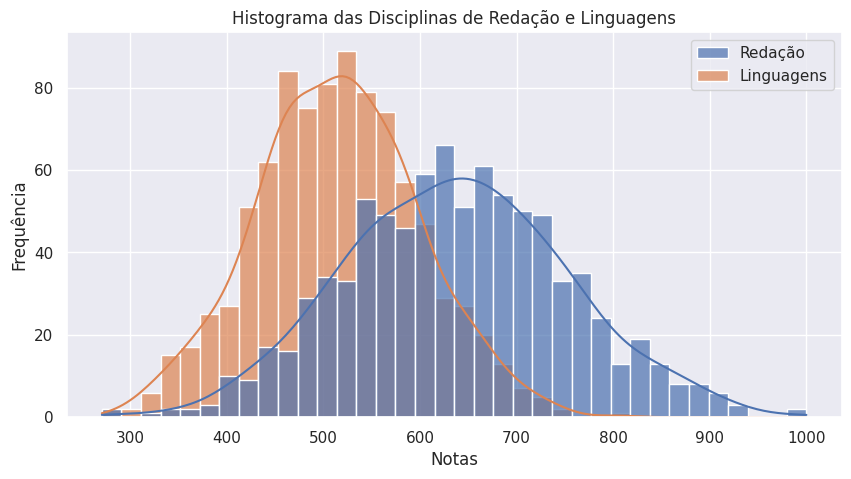

In [19]:
# Criando um novo DataFrame com as colunas de Redação e Linguagens
df_redacao_linguagens = df[["Redação", "Linguagens"]]

# Criando o histograma com as duas disciplinas juntas usando Seaborn
sns.set_theme()
plt.figure(figsize=(10, 5))
sns.histplot(data=df_redacao_linguagens, binwidth=20, alpha=0.7, kde=True)

# Adicionando rótulos e título ao gráfico
plt.xlabel('Notas')
plt.ylabel('Frequência')
plt.title('Histograma das Disciplinas de Redação e Linguagens')

# Exibindo o histograma
plt.grid(True)
plt.show()

### Resposta:  

A simetria nos histogramas sugere que as notas de Redação e Linguagens estão distribuídas de forma uniforme em torno de uma média, sem viés em direção a notas mais altas ou mais baixas. Isso indica uma distribuição simétrica, onde a maioria das notas se concentra perto da média, com quantidades semelhantes de notas acima e abaixo dela.

## Exercício 07.

Agora coloque um range fixo de 0 até 1000, você ainda tem a mesma opinião quanto a simetria? `[plt.hist(dado, bins=_, range=[0, 1000])`

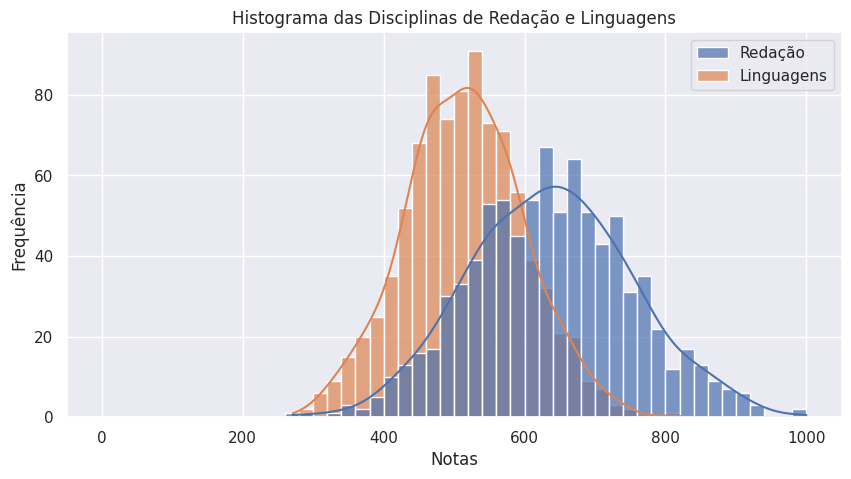

In [20]:
# Criando o histograma com as duas disciplinas juntas usando Seaborn
sns.set_theme()
plt.figure(figsize=(10, 5))
sns.histplot(data=df_redacao_linguagens, binwidth=20, binrange=(0, 1000), alpha=0.7, kde=True)

# Adicionando rótulos e título ao gráfico
plt.xlabel('Notas')
plt.ylabel('Frequência')
plt.title('Histograma das Disciplinas de Redação e Linguagens')

# Exibindo o histograma
plt.grid(True)
plt.show()

### Resposta:

Sim, os histogramas permanecem simétricos, independentemente do intervalo.

## Exercício 08.

Faça um boxplot do quartil de todas as disciplinas de ciências da natureza e redação. É possível enxergar outliers? Utilize o método IQR.

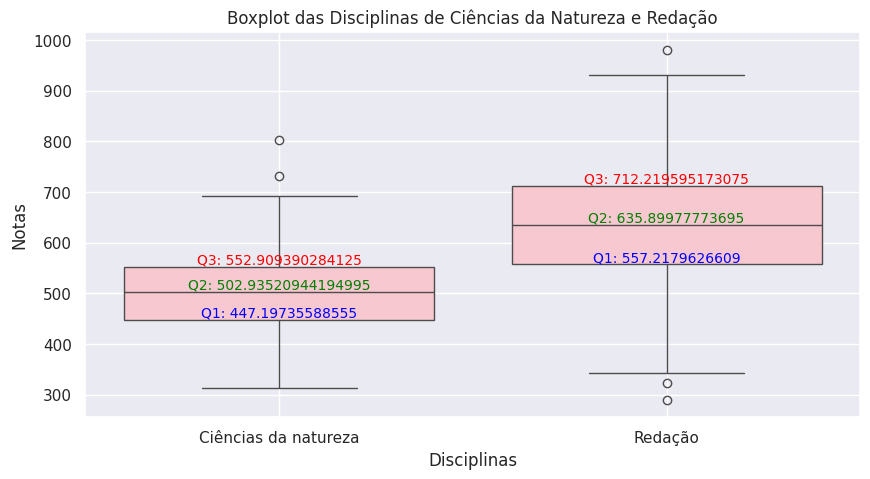

In [21]:
# Tratamento para valores nulos das colunas Ciências da Natureza e Redação
df_quartil = df[['Ciências da natureza', 'Redação']].dropna()

# Calculando os quartis utilizando o método IQR
quartis = df_quartil.quantile([0.25, 0.5, 0.75])

# Criando o boxplot
sns.set_theme()
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_quartil, color = 'pink', showfliers=True)

# Adicionando rótulos e título ao gráfico
plt.xlabel('Disciplinas')
plt.ylabel('Notas')
plt.title('Boxplot das Disciplinas de Ciências da Natureza e Redação')

# Adicionando valores às linhas dos quartis
for I in range(len(quartis.columns)):
    plt.text(I, quartis.iloc[0, I], f'Q1: {quartis.iloc[0, I]}', ha='center', va='bottom', fontsize=10, color='blue')
    plt.text(I, quartis.iloc[1, I], f'Q2: {quartis.iloc[1, I]}', ha='center', va='bottom', fontsize=10, color='green')
    plt.text(I, quartis.iloc[2, I], f'Q3: {quartis.iloc[2, I]}', ha='center', va='bottom', fontsize=10, color='red')

# Exibindo o boxplot
plt.grid(True)
plt.show()

In [22]:
# Método IQR
def find_outlier_iqr(dataset, colname):
  q25 = np.quantile(dataset[colname], 0.25)
  q75 = np.quantile(dataset[colname], 0.75)

  # Calcula  IQR
  iqr = q75 - q25

  # Calcula outlier cutoff
  cut_off = iqr * 1.5

  # Calcula margens inferiores (lower) e superiores (upper)
  lower = q25 - cut_off
  upper = q75 + cut_off

  outliers = []

  for I in dataset[colname].values:
    if((I > upper) or (I < lower)):
      outliers.append(I)

  print(f"Disciplina: {colname}.")
  print(f"Número de outliers encontrado: {len(outliers)}.")
  print(f"IQR: {iqr}. \nValor mínimo: {lower}. \nValor máximo: {upper}.\n")

# Resposta
for column in df_quartil:
    find_outlier_iqr(df_quartil, column)


Disciplina: Ciências da natureza.
Número de outliers encontrado: 2.
IQR: 105.71203439857504. 
Valor mínimo: 288.62930428768743. 
Valor máximo: 711.4774418819876.

Disciplina: Redação.
Número de outliers encontrado: 3.
IQR: 155.0016325121751. 
Valor mínimo: 324.7155138926373. 
Valor máximo: 944.7220439413377.



## Exercício 9.

Remova todos os outliers e verifique se eles são passíveis de alterar a média nacional significativamente? (considere significativamente um valor acima de 5%)

In [23]:
# Essa busca outliers e substitiu seu valor para NaN
def replace_na_outlier_zscore(dataset, threshold, colname):
  df = dataset[colname]
  outliers = []
  zscore = []
  val = []
  threshold = threshold
  mean = np.mean(df)
  std = np.std(df)

  for I in df.values:
    z_score = (I - mean) / std
    zscore.append(z_score)

    if np.abs(z_score) > threshold:
      outliers.append(I)
      val.append(np.nan)
    else:
      val.append(I)

  return val

# Essa função remove os outliers removendo todos os valores nulos
def drop_outliers(dataset, threshold):
  for column in dataset.select_dtypes(include=np.number).columns:
    dataset[column] =  replace_na_outlier_zscore(dataset, 3, column)
  return dataset.dropna()

# Essa função valida se existe alteração significativa
def validar_diferenca(diferenca_percentual):
  if diferenca_percentual < 5:
    return "Não. A remoção dos outliers não resultou em alterações significativas na média nacional"
  else:
    return "Sim. A remoção dos outliers resultou em alterações significativas na média nacional"

# Criando um DataFrame sem outliers
df_original = df.copy()
df_sem_outliers = drop_outliers(df_original, 3)

# Calculando a média nacional
media_nacional_original = df.mean(numeric_only=True).mean()
media_nacional_sem_outliers = df_sem_outliers.mean(numeric_only=True).mean()

# Calculando diferença percentual
diferenca_percentual = ((media_nacional_sem_outliers - media_nacional_original) / media_nacional_original) * 100

# Resposta
print(f"Média nacional antes de remover outliers: {media_nacional_original}.")
print(f"Média nacional após remover outliers: {media_nacional_sem_outliers}.")
print(f"Diferença percentual entre as médias: {diferenca_percentual}.")
print(f"Podemos concluir que: {validar_diferenca(diferenca_percentual)}.")

Média nacional antes de remover outliers: 542.9263730172955.
Média nacional após remover outliers: 544.6595217885949.
Diferença percentual entre as médias: 0.3192235370087992.
Podemos concluir que: Não. A remoção dos outliers não resultou em alterações significativas na média nacional.


## Exercício 10.

Considerando valores nulos, tente encontrar qual seria a melhor medida de tendência que pode substituir as notas nulas. Média, moda ou mediana? Substitua o valor por todos os três e diga qual delas altera menos a média geral e o desvio padrão.

In [24]:
# Dataframe original com valores nulos
df_original = df.select_dtypes(include=np.number)

# Substituindo valores nulos de cada coluna pela média
df_media = df_original.copy()
for coluna in colunas_numericas:
    media_coluna = df_original[coluna].mean()
    df_media[coluna].fillna(media_coluna, inplace=True)

# Substituindo valores nulos de cada coluna pela moda
df_moda = df_original.copy()
for coluna in colunas_numericas:
    moda_coluna = df_original[coluna].mode()[0]
    df_moda[coluna].fillna(moda_coluna, inplace=True)

df_mediana = df_original.copy()
for coluna in colunas_numericas:
    mediana_coluna = df_original[coluna].median()
    df_mediana[coluna].fillna(mediana_coluna, inplace=True)

In [25]:
# Encontra melhor medida para média (a que mais se aproxima do Dataframe Original)
medias_originais = df_original.mean()

menor_diferenca = float('inf')  # Inicializa com um valor grande
tipo_dataframe = None

for nome_dataframe, dataframe in zip(["Média", "Moda", "Mediana"], [df_media, df_moda, df_mediana]):
    # Calcula a diferença absoluta entre as médias de cada coluna
    diferenca_absoluta = (dataframe.mean() - medias_originais).abs()

    # Verifica se essa diferença é menor que a menor diferença encontrada até agora
    if diferenca_absoluta.sum() < menor_diferenca:
        menor_diferenca = diferenca_absoluta.sum()
        tipo_dataframe = nome_dataframe

# Resposta
print(f"Após a substituição dos valores nulos, a medida de tendência central que menos impactou a média geral foi a {tipo_dataframe}.")

Após a substituição dos valores nulos, a medida de tendência central que menos impactou a média geral foi a Média.


In [26]:
# Encontra melhor medida para Desvio Padrão (a que mais se aproxima do Dataframe Original)
std_originais = df_original.std()

menor_diferenca_std = float('inf')  # Inicializa com um valor grande
tipo_dataframe_std = None

for nome_dataframe, dataframe in zip(["Média", "Moda", "Mediana"], [df_media, df_moda, df_mediana]):
    # Calcula a diferença absoluta entre os desvios de cada coluna
    diferenca_absoluta_std = (dataframe.std() - std_originais).abs()

    # Verifica se essa diferença é menor que a menor diferença encontrada até agora
    if diferenca_absoluta_std.sum() < menor_diferenca_std:
        menor_diferenca_std = diferenca_absoluta_std.sum()
        tipo_dataframe_std = nome_dataframe

# Resposta
print(f"Após a substituição dos valores nulos, a medida de tendência central que menos impactou o desvio padrão geral foi a {tipo_dataframe_std}.")

Após a substituição dos valores nulos, a medida de tendência central que menos impactou o desvio padrão geral foi a Mediana.


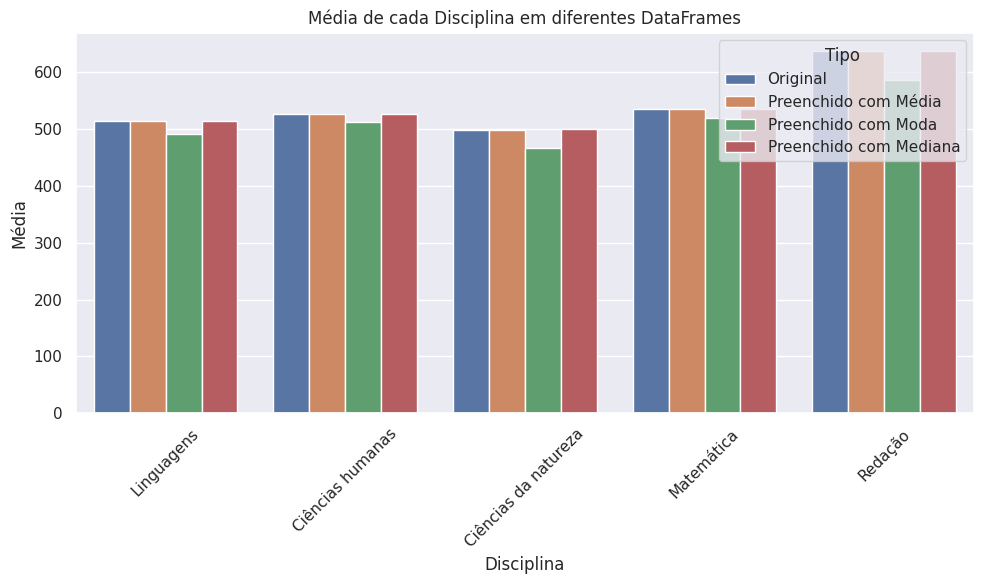

In [27]:
# Exibindo o gráfico
df_concatenado = pd.concat([df_original.mean(), df_media.mean(), df_moda.mean(), df_mediana.mean()], axis=1)
df_concatenado.columns = ['Original', 'Preenchido com Média', 'Preenchido com Moda', 'Preenchido com Mediana']
df_concatenado = df_concatenado.reset_index()

# Plota o gráfico usando o Seaborn
df_melted = df_concatenado.melt(id_vars='index', var_name='Tipo', value_name='Média')

sns.set_theme()
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='index', y='Média', hue='Tipo')
plt.title('Média de cada Disciplina em diferentes DataFrames')
plt.xlabel('Disciplina')
plt.ylabel('Média')
plt.xticks(rotation=45)
plt.legend(title='Tipo')
plt.tight_layout()
plt.show()

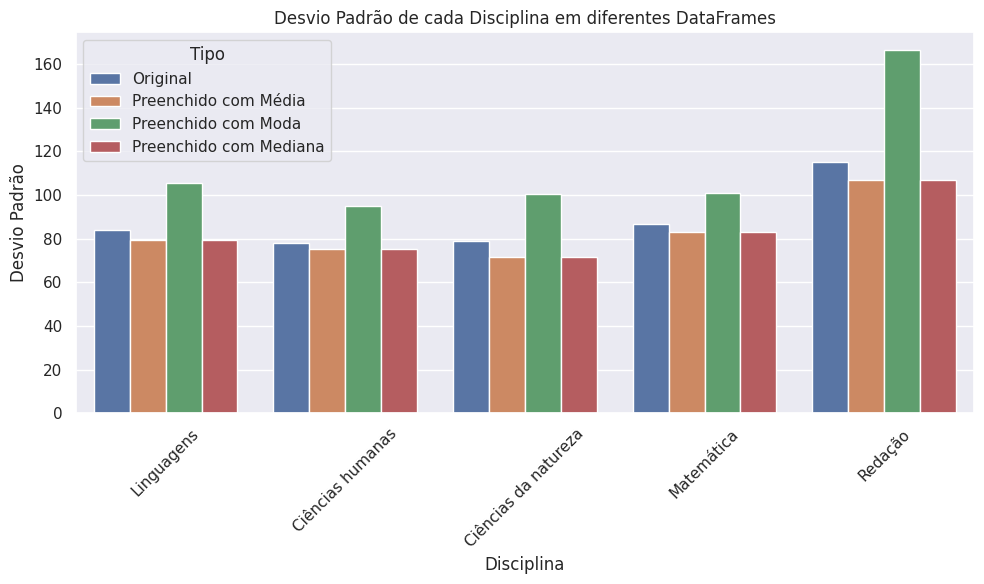

In [28]:
# Exibindo o gráfico
df_concatenado = pd.concat([df_original.std(), df_media.std(), df_moda.std(), df_mediana.std()], axis=1)
df_concatenado.columns = ['Original', 'Preenchido com Média', 'Preenchido com Moda', 'Preenchido com Mediana']
df_concatenado = df_concatenado.reset_index()

# Plota o gráfico usando o Seaborn
df_melted = df_concatenado.melt(id_vars='index', var_name='Tipo', value_name='Desvio Padrão')

sns.set_theme()
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='index', y='Desvio Padrão', hue='Tipo')
plt.title('Desvio Padrão de cada Disciplina em diferentes DataFrames')
plt.xlabel('Disciplina')
plt.ylabel('Desvio Padrão')
plt.xticks(rotation=45)
plt.legend(title='Tipo')
plt.tight_layout()
plt.show()